# Feature Engineering

In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

# Step 1 - Data Ingestion

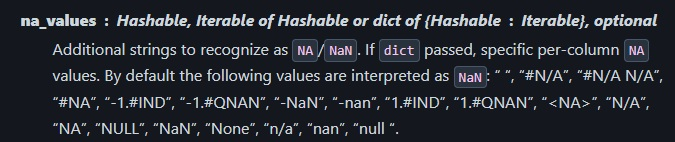

In [2]:
import pandas as pd

df = pd.read_csv("Cars93.csv")
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [3]:
df.isna().sum()

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags               38
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [4]:
df = pd.read_csv("Cars93.csv", na_values=["", "NA"], keep_default_na=False)
df.head()

# na_values can be a list of strings
# na_values can also be a dictionary
# keep_default_na can be set to False to ignore default NaN values

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [5]:
df.isna().sum()

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

### Target feature - Weight (Y)
Weight ~ Remaining Features

# Step 2 - Perform Basic Data Quality Checks

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  94 non-null     int64  
 1   Manufacturer        94 non-null     object 
 2   Model               94 non-null     object 
 3   Type                94 non-null     object 
 4   Min.Price           94 non-null     float64
 5   Price               94 non-null     float64
 6   Max.Price           94 non-null     float64
 7   MPG.city            94 non-null     int64  
 8   MPG.highway         94 non-null     int64  
 9   AirBags             90 non-null     object 
 10  DriveTrain          94 non-null     object 
 11  Cylinders           94 non-null     object 
 12  EngineSize          94 non-null     float64
 13  Horsepower          94 non-null     int64  
 14  RPM                 94 non-null     int64  
 15  Rev.per.mile        94 non-null     int64  
 16  Man.trans.

In [7]:
m = df.isna().sum()
m

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [8]:
m[m > 0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

In [9]:
# Duplicates
df.duplicated().sum()

np.int64(1)

In [10]:
# Drop the duplicates
df = df.drop_duplicates(keep="first").reset_index(drop=True)
# reset_index(drop=True) resets the index after dropping duplicates
# keep="first" keeps the first occurrence of each duplicate
# Check again
# drop duplicates is used to remove duplicate rows in a DataFrame

In [11]:
df.shape

(93, 28)

# Step 3 - Separating X & Y (Weight)
Columns like ID will not impact target feature

In [12]:
X = df.drop(columns=["id", "Weight"])
Y = df[["Weight"]]
X.head()
# X is the feature set, Y is the target variable

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [13]:
Y.head()
# Save the cleaned DataFrame to a new CSV file

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


# Step 4 - Data Cleaning
(Handling Missing Values)
1. Categorical (Text) - Mode (Most Frequently Occuring Value)
2. Contineous (Numerical) - Mean/Median

In [14]:
X.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Origin', 'Make'],
      dtype='object')

In [15]:
X.dtypes
# Convert categorical columns to category dtype

Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city                int64
MPG.highway             int64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower              int64
RPM                     int64
Rev.per.mile            int64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers              int64
Length                  int64
Wheelbase               int64
Width                   int64
Turn.circle             int64
Rear.seat.room        float64
Luggage.room          float64
Origin                 object
Make                   object
dtype: object

In [16]:
categorical_cols = list(X.columns[X.dtypes == "object"])
categorical_cols
# This will give you a list of columns with object data type (usually categorical)
# [] is used to filter the columns based on their data type

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [17]:
continuous_cols = list(X.columns[X.dtypes != "object"])
continuous_cols
# This will give you a list of columns with non-object data type (usually continuous)
# == called equal to, is used to filter the columns based on their data type
# != called not equal to, is used to filter the columns based on their data type

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

In [18]:
df["AirBags"].mode()[0]
# Mode is the most frequent value in a column

'Driver only'

In [19]:
df["AirBags"].value_counts()
# value_counts() returns a Series containing counts of unique values in a column
# This will give you the count of each unique value in the AirBags column

AirBags
Driver only           42
None                  33
Driver & Passenger    14
Name: count, dtype: int64

In [20]:
df["Luggage.room"].mean()
# mean() calculates the average of the values in a column

np.float64(13.890243902439025)

In [21]:
df["Luggage.room"].median()
# median() calculates the middle value of the values in a column

np.float64(14.0)

In [22]:
def replacer(df):
    """
    This function replaces NaN values in categorical columns with the mode of that column.
    For continuous columns, it replaces NaN values with the median of that column.
    """
    # Get a list of categorical columns
    categorical_cols = list(df.columns[df.dtypes == "object"])
    for col in df.columns:
        if col in categorical_cols:
            # Fill NaN values in categorical columns with the mode of that column
            mode = df[col].mode()[0]
            df[col] = df[col].fillna(mode)
        else:
            # Fill NaN values in continuous columns with the mean of that column
            median = df[col].median()
            df[col] = df[col].fillna(median)
    print("Missing Values replaced")


# replacer(df) # This function replaces NaN values in categorical columns with the mode of that column
# for col in categorical_cols: # This iterates over each categorical column
# fillna(mode) # This fills NaN values in the column with the mode of that column

In [23]:
X.isna().sum()
# Check for missing values after replacement

Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Origin                 0
Make                   0
dtype: int64

In [24]:
replacer(X)

Missing Values replaced


In [25]:
X.isna().sum()
# Check for missing values after replacement

Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Origin                0
Make                  0
dtype: int64

In [26]:
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver only,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [27]:
X.to_csv("Cleaned.csv", index=False)
# Save the cleaned DataFrame to a new CSV file without the index

# Step 5 - Preprocessing
1. Categorical - OneHotEnoding
2. Contineous - StandardScalar

In [28]:
categorical_cols
# List of categorical columns

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [29]:
continuous_cols
# List of continuous columns

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

In [30]:
X_cat = X[categorical_cols]
X_cat
# DataFrame containing only categorical columns

,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin,Make
0,Acura,Integra,Small,None,Front,4,Yes,non-USA,Acura Integra
1,Acura,Legend,Midsize,Driver & Passenger,Front,6,Yes,non-USA,Acura Legend
2,Audi,90,Compact,Driver only,Front,6,Yes,non-USA,Audi 90
3,Audi,100,Midsize,Driver only,Front,6,Yes,non-USA,Audi 100
4,BMW,535i,Midsize,Driver only,Rear,4,Yes,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,None,Front,5,Yes,non-USA,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,None,Front,4,Yes,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,None,Front,6,Yes,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,Driver only,Rear,4,Yes,non-USA,Volvo 240


In [31]:
X_con = X[continuous_cols]
X_con
# DataFrame containing only continuous columns

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,12.9,15.9,18.8,25,31,1.8,140,6300,2890,13.2,5,177,102,68,37,26.5,11.0
1,29.2,33.9,38.7,18,25,3.2,200,5500,2335,18.0,5,195,115,71,38,30.0,15.0
2,25.9,29.1,32.3,20,26,2.8,172,5500,2280,16.9,5,180,102,67,37,28.0,14.0
3,30.8,37.7,44.6,19,26,2.8,172,5500,2535,21.1,6,193,106,70,37,31.0,17.0
4,23.7,30.0,36.2,22,30,3.5,208,5700,2545,21.1,4,186,109,69,39,27.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,16.6,19.7,22.7,17,21,2.5,109,4500,2915,21.1,7,187,115,72,38,34.0,14.0
89,17.6,20.0,22.4,21,30,2.0,134,5800,2685,18.5,5,180,103,67,35,31.5,14.0
90,22.9,23.3,23.7,18,25,2.8,178,5800,2385,18.5,4,159,97,66,36,26.0,15.0
91,21.8,22.7,23.5,21,28,2.3,114,5400,2215,15.8,5,190,104,67,37,29.5,14.0


### Apply One Hot Encoding on Categorical Features 

In [32]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder is used to convert categorical variables into a format that can be provided to ML algorithms to do a better job in prediction

In [33]:
# handle_unknown="ignore" will ignore any unknown categories during transformation
# sparse_output=False will return a dense array instead of a sparse matrix
# drop="first" will drop the first category of each categorical variable to avoid multicollinearity
# multicollinearity occurs when two or more independent variables are highly correlated, which can lead to unreliable estimates of coefficients in regression models
# set_output(transform="pandas") will return a DataFrame instead of a NumPy array

ohe = OneHotEncoder(
    handle_unknown="ignore", sparse_output=False, drop="first"
).set_output(transform="pandas")
X_cat_pre = ohe.fit_transform(X_cat)

In [34]:
X_cat_pre.head()
# The transformed DataFrame will have the same index as the original DataFrame

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrylser,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Eagle,Manufacturer_Ford,...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Contineous Cols use StandardScaler

In [35]:
from sklearn.preprocessing import StandardScaler

# StandardScaler is used to standardize features by removing the mean and scaling to unit variance

In [36]:
# Create a StandardScaler instance with output set to pandas DataFrame

scaler = StandardScaler().set_output(transform="pandas")
X_con_pre = scaler.fit_transform(X_con)

In [37]:
X_con_pre.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,-0.083243,-0.427186,-0.286932,-0.366184,-0.610436,-0.449727,-1.037572
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,-0.083243,0.812171,1.629649,0.431983,-0.298510,0.740403,0.391972
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,-0.083243,-0.220626,-0.286932,-0.632239,-0.610436,0.060329,0.034586
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,0.884457,0.674465,0.302785,0.165927,-0.610436,1.080441,1.106743
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,-1.050944,0.192493,0.745073,-0.100128,0.013416,-0.279708,-0.322800


### Combining X_cat_pre & X_con_pre

In [38]:
X_pre = X_con_pre.join(X_cat_pre)
# Join the continuous and categorical preprocessed DataFrames
X_pre.head()
# The final preprocessed DataFrame will have both continuous and categorical features

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Step 6 - Apply Train Test Split

$ test = 80%$
$ real = 20%$

In [40]:
from sklearn.model_selection import train_test_split

# train_test_split is used to split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre,
    Y,
    test_size=0.2,
)

In [41]:
xtest.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
81,-0.094933,-0.001007,0.073018,0.113500,0.172352,-0.453339,-0.265452,0.538074,-0.004464,-0.234393,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,-0.060445,-0.042642,-0.018132,-0.781032,-0.959087,0.322027,0.214467,-0.472853,-0.186713,0.899988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,1.859342,1.539479,1.221501,-0.959938,-0.581941,1.097393,0.310451,-1.483780,-1.006833,0.532081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59,-0.439804,-0.563077,-0.628833,0.113500,-0.581941,-1.034864,-0.841356,0.790806,0.289160,-1.706021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
ytest.head()
# The training set will be used to train the model, and the testing set will be used to evaluate the model's performance

,Weight
81,3085
55,3735
50,3695
59,2450
3,3405


In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre,
    Y,
    test_size=0.2,
    random_state=42,  # Setting a random state for reproducibility
)

In [44]:
xtest.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
40,-0.014462,0.030219,0.073018,0.292406,0.360925,-0.356418,0.310451,0.875050,1.058655,-0.234393,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,-1.060574,-1.073102,-1.029891,1.186938,0.738071,-1.131784,-0.994930,1.212025,1.929401,-1.062184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,-0.060445,-0.042642,-0.018132,-0.781032,-0.959087,0.322027,0.214467,-0.472853,-0.186713,0.899988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,-1.026087,-1.093920,-1.093695,1.544751,2.246656,-1.034864,-1.340472,0.538074,1.615527,-1.062184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
ytest.head()
# The training set will be used to train the model, and the testing set will be used to evaluate the model's performance

,Weight
40,2865
22,2270
55,3735
72,2350
0,2705


In [ ]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape
# The shapes of the training and testing sets will give you an idea of how many samples are in each set
# xtest.shape will give you the number of samples in the testing set
# ytrain.shape will give you the number of samples in the training set
# x is the feature set, y is the target variable
# The shapes of the training and testing sets will give you an idea of how many samples are in each set

((74, 248), (19, 248), (74, 1), (19, 1))

# Step 7 - Model Evaluation

In [47]:
from sklearn.linear_model import LinearRegression

# LinearRegression is used to fit a linear model to the data

model = LinearRegression()
# Create an instance of the LinearRegression model
model.fit(xtrain, ytrain)

LinearRegression()

In [48]:
model.coef_
# The coefficients of the linear regression model will give you an idea of the importance of each feature in predicting the target variable

array([[-6.20956559e+00,  4.17294621e+00,  1.10932542e+01,
        -2.32266750e+01, -8.01594667e+01,  1.42495564e+01,
         1.37970641e+02, -4.19903331e+01, -1.85765386e+01,
         1.79556494e+01,  7.38435477e+01,  5.69546889e+01,
         1.27379762e+02,  7.22146485e+01,  3.21193982e+01,
        -2.59859988e+01,  8.36175456e+00,  1.87175268e+01,
         1.20792265e-13, -3.42754074e+01, -5.64838080e+01,
        -3.12629305e+01,  1.33469835e+01,  5.58142521e+01,
         5.23193562e+01, -4.10221579e+01, -4.29240512e+00,
        -6.96202695e+00,  4.28048871e+01, -1.27292706e+01,
         1.03598019e+01,  3.04548203e+01,  2.88356609e+01,
        -2.69420930e+01, -3.58461492e+01,  1.09090885e+01,
        -6.11196160e+01,  4.40342712e+01, -4.98840726e+01,
         1.58069352e+01, -4.18562599e+01, -5.03236815e+01,
        -1.70162558e+01,  2.62161531e+01,  1.26115493e+01,
         5.26486333e+01,  8.46225404e+01,  9.41158011e+00,
        -1.34287731e+01, -2.14811946e+00, -2.24173761e+0

# Step 8 - Checking if the model works

In [49]:
model.score(xtest, ytest)
# The score method returns the coefficient of determination R^2 of the prediction

0.9230424080106019

In [50]:
model.score(xtrain, ytrain)
# The score method returns the coefficient of determination R^2 of the prediction on the training set

1.0

In [51]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    root_mean_squared_error,
    mean_absolute_percentage_error,
)

In [52]:
def evaluate_model(model, x, y):
    # This function evaluates the model's performance using various metrics
    # It calculates Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2)
    ypred = model.predict(x)

    mae = mean_absolute_error(y, ypred)
    mse = mean_squared_error(y, ypred)
    rmse = root_mean_squared_error(y, ypred)
    r2 = r2_score(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)

    # Print the evaluation metrics
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")

In [53]:
print("Evaluation on Training Set:")
evaluate_model(model, xtrain, ytrain)
# The evaluate_model function calculates and prints various evaluation metrics for the model's performance

Evaluation on Training Set:
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
R-squared (R2): 1.00
Mean Absolute Percentage Error (MAPE): 0.00


In [54]:
print("\nEvaluation on Testing Set:")
evaluate_model(model, xtest, ytest)
# The evaluate_model function calculates and prints various evaluation metrics for the model's performance on the testing set


Evaluation on Testing Set:
Mean Absolute Error (MAE): 119.91
Mean Squared Error (MSE): 25411.05
Root Mean Squared Error (RMSE): 159.41
R-squared (R2): 0.92
Mean Absolute Percentage Error (MAPE): 0.04


In [55]:
ypred_train = model.predict(xtrain)
ypred_train[0:5]
# Predict the target variable for the testing set

array([[4100.],
       [3715.],
       [2890.],
       [2495.],
       [1845.]])

In [56]:
ytrain.head()
# Display the first 5 predictions and the actual values for comparison

,Weight
65,4100
15,3715
68,2890
78,2495
30,1845


In [57]:
ypred_test = model.predict(xtest)
ypred_test[0:5]

array([[2901.34960585],
       [2343.46583184],
       [3765.77413756],
       [2122.78844714],
       [2745.00637518]])

In [58]:
ytest.head()
# The training set will be used to train the model, and the testing set will be used to evaluate the model's performance

,Weight
40,2865
22,2270
55,3735
72,2350
0,2705


### From the above results, it is clear that R2 Score in the test is greater than 80%, hence it is good

# Step 9 - Out of Sample Predcition

In [59]:
xnew = pd.read_csv("sample.csv", na_values=["", "NA"], keep_default_na=False)

In [60]:
xnew.head()
# Preprocess the new data using the same preprocessing steps as before

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,15.0,6,190,106,65,37,31.0,17.0,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,15.2,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,16.5,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,20.0,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,12.4,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox


In [61]:
m2 = xnew.isna().sum()
m2[m2 > 0]

AirBags           1
Rear.seat.room    1
Luggage.room      1
dtype: int64

In [62]:
replacer(xnew)
# Replace missing values in the new data

Missing Values replaced


In [63]:
xnew.isna().sum()

Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Origin                0
Make                  0
dtype: int64

In [64]:
xnew.head()
# Preprocess the new data using the same preprocessing steps as before

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,None,Front,...,15.0,6,190,106,65,37,31.00,17.0,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,15.2,5,181,101,66,39,25.00,13.0,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,16.5,6,198,108,71,40,28.50,16.0,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,20.0,2,169,96,69,37,27.25,14.5,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,12.4,4,163,93,63,34,26.00,10.0,non-USA,Volkswagen Fox


### Transfer new data ohe (one hot encoding) and standardscaler

In [69]:
ohe

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [65]:
scaler

StandardScaler()

In [66]:
xnew_cat = xnew[categorical_cols]
xnew_con = xnew[continuous_cols]

In [67]:
xnew_cat

,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin,Make
0,Audi,100,Midsize,None,Front,6,Yes,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,None,Front,4,Yes,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,None,Front,4,No,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,Driver only,Rear,rotary,Yes,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,None,Front,4,Yes,non-USA,Volkswagen Fox


In [68]:
xnew_con

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,30.8,37.7,44.6,19,26,2.8,172,5500,2535,15.0,6,190,106,65,37,31.00,17.0
1,9.4,11.1,12.8,23,31,2.0,110,5200,2665,15.2,5,181,101,66,39,25.00,13.0
2,13.4,15.9,18.4,21,29,2.2,110,5200,2595,16.5,6,198,108,71,40,28.50,16.0
3,32.5,32.5,32.5,17,25,1.3,255,6500,2325,20.0,2,169,96,69,37,27.25,14.5
4,8.7,9.1,9.5,25,33,1.8,81,5500,2550,12.4,4,163,93,63,34,26.00,10.0


In [70]:
# Apply ohe on categorical columns
xnew_cat_pre = ohe.transform(xnew_cat)
xnew_cat_pre

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrylser,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Eagle,Manufacturer_Ford,...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [71]:
# Apply scaler on continuous columns
xnew_con_pre = scaler.transform(xnew_con)
xnew_con_pre

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,-0.510323,0.884457,0.467905,0.302785,-1.164350,-0.610436,1.080441,1.106743
1,-0.888138,-0.875337,-0.829362,0.113500,0.360925,-0.647181,-0.649388,-0.135877,0.673908,-0.449005,-0.083243,-0.151773,-0.434362,-0.898295,0.013416,-0.959782,-0.322800
2,-0.428309,-0.375720,-0.318925,-0.244313,-0.016221,-0.453339,-0.649388,-0.135877,0.532158,-0.050439,0.884457,1.018731,0.597644,0.431983,0.325342,0.230348,0.749357
3,1.767376,1.352122,0.966282,-0.959938,-0.770514,-1.325626,2.134145,2.054464,-0.014589,1.022624,-2.986345,-0.978011,-1.171509,-0.100128,-0.610436,-0.194699,0.213279
4,-0.968608,-1.083511,-1.130155,0.471312,0.738071,-0.841022,-1.206095,0.369586,0.441034,-1.307455,-1.050944,-1.391130,-1.613797,-1.696461,-1.546214,-0.619745,-1.394958


In [87]:
# Combine the preprocessed categorical and continuous columns
xnew_pre = xnew_con_pre.join(xnew_cat_pre)

In [88]:
xnew_pre

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
0,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,-0.510323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.888138,-0.875337,-0.829362,0.113500,0.360925,-0.647181,-0.649388,-0.135877,0.673908,-0.449005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.428309,-0.375720,-0.318925,-0.244313,-0.016221,-0.453339,-0.649388,-0.135877,0.532158,-0.050439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.767376,1.352122,0.966282,-0.959938,-0.770514,-1.325626,2.134145,2.054464,-0.014589,1.022624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.968608,-1.083511,-1.130155,0.471312,0.738071,-0.841022,-1.206095,0.369586,0.441034,-1.307455,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Predict the Weights

In [89]:
preds = model.predict(xnew_pre)
# Predict the target variable for the new data

### Saving the dataframe

In [ ]:
xnew["Weight_pred"] = preds
# Add the predictions to the new data DataFrame
xnew = xnew.round(2)
# .round(2) rounds the values in the DataFrame to 2 decimal places

In [ ]:
xnew.to_csv("Results.csv", index=False)
# Save the new data with predictions to a CSV file without the index

#### Save preprocessor & model object

In [ ]:
!uv add joblib

Resolved 53 packages in 414ms
Audited 47 packages in 0.05ms


In [77]:
ohe

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [78]:
scaler

StandardScaler()

In [76]:
import joblib

# Save the model to a file using joblib

In [79]:
joblib.dump(ohe, "ohe.joblib")

['ohe.joblib']

In [80]:
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

In [81]:
joblib.dump(model, "model.joblib")

['model.joblib']

### Load objects from file

In [82]:
o = joblib.load("ohe.joblib")

In [83]:
o

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [84]:
s = joblib.load("scaler.joblib")
s

StandardScaler()

In [85]:
m = joblib.load("model.joblib")
m

LinearRegression()

In [86]:
m.score(xtest, ytest)
# Load the model and preprocessors from the saved files
# The loaded model can be used to make predictions on new data

0.9230424080106019